# Shortest Path distance for transportation data

This chapter will tackle the following topics: 
1. Introduction to transportation problems
2. Shortest path applications
3. Traveling salesman problem
4. Maximum flow/minimum cut (max-flow min-cut) algorithm

Transporting physical goods is vital across industries like retail, manufacturing, and the military. Efficient supply chain logistics—which involves acquiring, moving, and storing goods—is crucial to business operations and profitability. Disruptions, like those caused by the COVID-19 pandemic or the Ukraine war, highlight the vulnerability of global supply chains.

These logistics challenges can be modeled using graph theory and network science, allowing for optimized routing of goods between locations, such as grocery stores. While simple routing may seem easy, real-world factors complicate planning, including road conditions, fuel stops, delivery priorities, and environmental hazards.

Key considerations in logistics planning include:

* Fuel Costs: Rising prices and route availability affect delivery budgets.

* Time-to-Delivery (TTD): Perishable goods, seasonal demand, and customs delays make timing as critical as cost.

* Navigational Hazards: Natural events (e.g., hurricanes, floods) and man-made obstacles (e.g., construction) influence route planning.

Using graph theory, businesses can build models to:

* Calculate shortest paths,

* Weigh routes by cost, time, and risk,

* Select optimal transportation modes.

The chapter introduces these concepts with a case study involving five grocery stores in Miami needing produce delivery, setting the stage for deeper exploration of shortest path algorithms and their applications in logistics.

## 1. Build the graph 

{('store1', 'store2'): Text(0.4892182083457699, 0.19862955504764807, '2'),
 ('store1', 'store3'): Text(-0.032301977788797676, 0.22174407273174113, '2.4'),
 ('store1', 'store4'): Text(-0.16980374471322174, -0.2844039662964118, '3'),
 ('store1', 'store5'): Text(0.2674217619917237, -0.45805560564566594, '3'),
 ('store1', 'store6'): Text(0.7662507733116389, -0.6928335770052474, '100'),
 ('store2', 'store3'): Text(-0.2034762800165843, 0.9278333883633572, '3.7'),
 ('store2', 'store4'): Text(-0.34097804694100836, 0.4216853493352042, '1.4'),
 ('store2', 'store5'): Text(0.09624745976393706, 0.24803370998595006, '4.3'),
 ('store3', 'store4'): Text(-0.8624982330755759, 0.44479986701929725, '4.9'),
 ('store3', 'store5'): Text(-0.4252727263706305, 0.2711482276700431, '0.9'),
 ('store4', 'store5'): Text(-0.5627744932950546, -0.23499981135810977, '5.4'),
 ('store5', 'store6'): Text(0.3732800247298061, -0.6434294220669453, '7')}

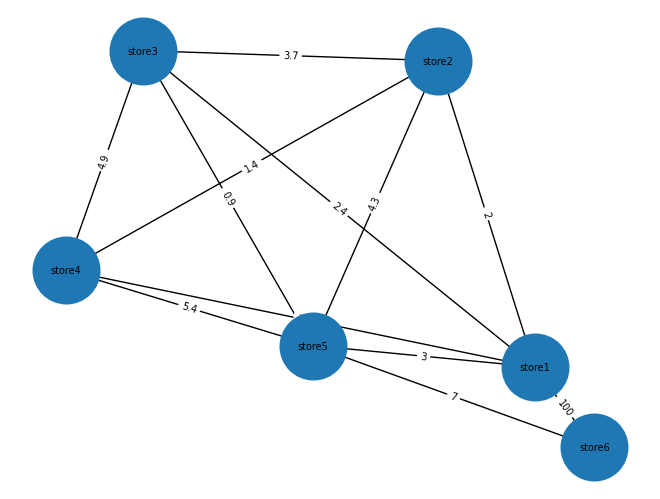

In [22]:
#import packages
import networkx as nx
import matplotlib.pyplot as plt

#create the Stores network
STRS = nx.Graph()
STRS.add_nodes_from(["store1","store2","store3","store4","store5","store6"])

#define weighted ebunches, which represent lists of edges
e1 = [("store1","store2",2),
      ("store1","store3",2.4),
      ("store1","store4",3),
      ("store1","store5",3)]

e2 = [("store2","store3",3.7),
      ("store2","store4",1.4),
      ("store2","store5",4.3)]

e3 = [("store3","store4",4.9),
      ("store3","store5",0.9),
      ("store4","store5",5.4)]

e4 = [("store1","store6",100),
      ("store5","store6",7)]


#add edges
STRS.add_weighted_edges_from(e1)
STRS.add_weighted_edges_from(e2)
STRS.add_weighted_edges_from(e3)
STRS.add_weighted_edges_from(e4)



#plot
weight_labels=nx.get_edge_attributes(STRS,'weight')
pos = nx.spring_layout(STRS)
nx.draw(STRS,pos,with_labels=True,node_size=2300,font_size=7)
nx.draw_networkx_edge_labels(STRS, pos,edge_labels=weight_labels,font_size=7)

## 2. Shortest path distance


Note that there are some other variants which are better too
1. **A\* (A-star)**: Used in pathfinding with heuristics (e.g. in games, maps).
2. **Bidirectional Dijkstra**: Speeds up shortest path search by running two simultaneous searches (from source and destination).
3. **Dial's Algorithm**: Optimized for graphs with bounded integer edge weights (e.g. weights from 0 to K).
4. **Fibonacci Heap Dijkstra**: Used for dense graphs to improve performance with a more efficient priority queue.
5. **Goal-directed Dijkstra**: Adds a heuristic to guide search toward the goal (like A* but simpler).
6. **Multi-Source Dijkstra**: Computes shortest paths from multiple sources simultaneously.
7. **Contraction Hierarchies**: Used in road networks to speed up queries after preprocessing.
8. **Dynamic Dijkstra**: Supports changing edge weights during runtime, useful in real-time systems.


Here we will compare only: 
| Algorithm         | Type of Search                    | Result Guarantees                  | Computational Speed                                |
|------------------|-----------------------------------|------------------------------------|----------------------------------------------------|
| Dijkstra’s       | Blind search of all vertices      | Always finds the shortest path     | Slow enough to limit use on dense or large networks |
| A*               | Heuristic function guiding search | No guarantees of finding shortest path | Fast enough for most problems                    |

### Dijkstra’s


Basically it is sort of a greedy algorithm. At each intersection node it chooses the least weighted path. The algorithm shows you how to store the data and use it a computer science perspective and how to implement it. This video nicely explains it: https://youtu.be/bZkzH5x0SKU?si=lgI7_PoWPZJRm3b1

In [24]:
#create adjacency matrix
adj1 = nx.adjacency_matrix(STRS)
adj1.todense()

array([[  0. ,   2. ,   2.4,   3. ,   3. , 100. ],
       [  2. ,   0. ,   3.7,   1.4,   4.3,   0. ],
       [  2.4,   3.7,   0. ,   4.9,   0.9,   0. ],
       [  3. ,   1.4,   4.9,   0. ,   5.4,   0. ],
       [  3. ,   4.3,   0.9,   5.4,   0. ,   7. ],
       [100. ,   0. ,   0. ,   0. ,   7. ,   0. ]])

In [25]:
#find all shortest paths starting at Store 1
length1, path1 = nx.single_source_dijkstra(STRS,"store1")
length1

{'store1': 0,
 'store2': 2,
 'store3': 2.4,
 'store4': 3,
 'store5': 3,
 'store6': 10}

In [23]:
%timeit nx.single_source_dijkstra(STRS,"store1")

8.59 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


When a network is big Dijkstra's algorthm can be slow

### A*(A-star)

{('store1', 'store2'): Text(-0.5425154316048715, -0.2205972956885029, '2'),
 ('store1', 'store4'): Text(-0.07189879061494343, -0.3110403934772391, '3'),
 ('store2', 'store3'): Text(-0.4281012093850568, 0.37254692561944774, '3.7'),
 ('store2', 'store4'): Text(-0.2256487518038996, 0.07437589330187659, '1.4'),
 ('store3', 'store4'): Text(0.04251543160487123, 0.28210382783071153, '4.9'),
 ('store4', 'store5'): Text(0.6224839445930143, -0.06954013438563822, '5.4')}

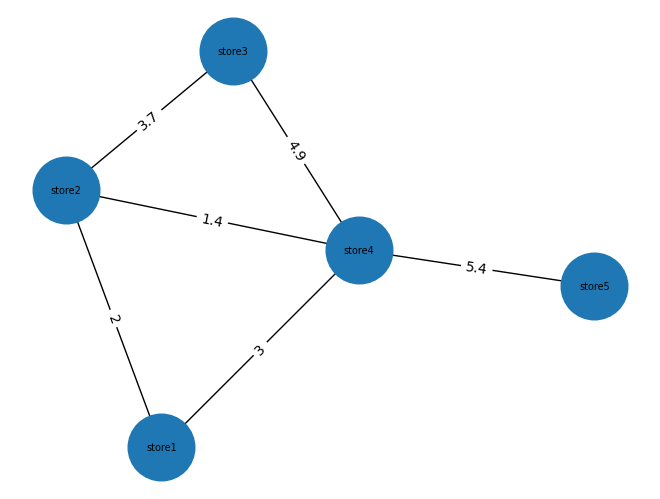

In [30]:
#create a different Stores network
STRS2 = nx.Graph()
STRS2.add_nodes_from(["store1","store2","store3","store4","store5"])

#define weighted ebunch
e12 = [("store1","store2",2),("store1","store4",3)]
e22 = [("store2","store3",3.7),("store2","store4",1.4)]
e32 = [("store3","store4",4.9),("store4","store5",5.4)]

#add edges
STRS2.add_weighted_edges_from(e12)
STRS2.add_weighted_edges_from(e22)
STRS2.add_weighted_edges_from(e32)

#plot
weight_labels=nx.get_edge_attributes(STRS2,'weight')
pos = nx.spring_layout(STRS2)
nx.draw(STRS2,pos,with_labels=True,node_size=2300,font_size=7)
nx.draw_networkx_edge_labels(STRS2,pos,edge_labels=weight_labels)

In [34]:
#find shortest path from Store 2 to Store 5
nx.astar_path(STRS2,"store2","store5", weight='weight')

['store2', 'store4', 'store5']

## 3. Traveling Salesman problem

The Traveling Salesman Problem (TSP) is about finding the shortest possible route that visits each location exactly once and returns to the starting point. For example, a delivery truck visiting several stores wants to minimize distance, time, and fuel.

TSP is related to graph theory, specifically to cycles in a graph (paths that start and end at the same point). It's a hard problem to solve, especially for many locations, because it requires a lot of computing power.

Tools like NetworkX use efficient methods like the Christofides algorithm, which gives a good (though not perfect) solution by building a minimal spanning tree and optimizing connections between points.

The Christofides algorithm is an approximation algorithm for solving the Traveling Salesman Problem (TSP) when the distances between cities follow the triangle inequality (i.e., going directly from A to C is never longer than going from A to B to C).

🔍 What does it do?
It finds a near-optimal solution — not necessarily the perfect shortest route, but guaranteed to be no more than 1.5 times longer than the shortest possible route.

In [41]:
#define traveling salesman algorithm and apply it to the stores's #networks
tsp = nx.approximation.traveling_salesman_problem
tsp(STRS)

['store1',
 'store3',
 'store5',
 'store6',
 'store5',
 'store4',
 'store2',
 'store1']

In [42]:
tsp(STRS2)

['store1',
 'store4',
 'store5',
 'store4',
 'store2',
 'store3',
 'store2',
 'store1']

## 4. Max-Flow Min-Cut

This algorithm helps maximize flow (like traffic, water, or data) through a network, while also showing where cuts or blockages would reduce flow the most.

🧠 Key Idea:
* Max-flow: The most you can send from a starting point (like a neighborhood) to an endpoint (like downtown).
* Min-cut: The smallest set of roads (or connections) that, if blocked, would stop that flow.



Let’s consider the example of traffic flow from a dense residential area outside of a city to the
downtown area, where most people work. 

We’d like to plan out work on replacing stoplights at key intersections throughout the city, which are divided by canals. Some roads in the city have more lanes than others, allowing for a higher volume of traffic to utilize those routes. We’d like to minimize disruption to commuters during the workday.

We can create a network of this situation, with the residential area designated as vertex "A" and the
downtown area as vertex "E" . We’ll designate the level of traffic the route can handle with the
capacity parameter.

{('a', 'b'): Text(-0.022951388740014834, -0.7387815942194134, '8'),
 ('a', 'd'): Text(-0.11684406301315312, -0.5046163462968504, '0.5'),
 ('b', 'd'): Text(-0.18538594171981995, -0.6042129820326078, '3.0'),
 ('d', 'c'): Text(-0.3071567665622007, -0.19095661234267672, '2.5'),
 ('c', 'e'): Text(-0.18559012918870657, 0.16815557374369222, '1.0'),
 ('e', 'f'): Text(0.13203116807116738, 0.42973820656208994, '4.0'),
 ('f', 'g'): Text(0.3481808259252006, 0.7556498875307434, '3.0')}

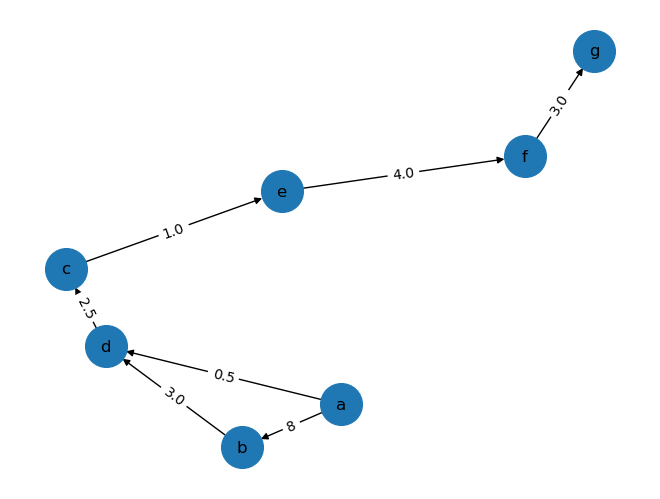

In [196]:
#build the city intersection network
G1=nx.DiGraph()
G1.add_edge("a", "b", capacity=8)
G1.add_edge("a", "d", capacity=0.5)
G1.add_edge("b", "d", capacity=3.0)
G1.add_edge("d", "c", capacity=2.5)
G1.add_edge("c", "e", capacity=1.0)
G1.add_edge("e", "f", capacity=4.0)
G1.add_edge("f", "g", capacity=3.0)

#plot network
capacity_labels=nx.get_edge_attributes(G1,'capacity')
pos = nx.spring_layout(G1)
nx.draw(G1,pos,with_labels=True,node_size=900,font_size=12)
nx.draw_networkx_edge_labels(G1,pos,edge_labels=capacity_labels)

In [197]:
#find cut-points
partition = nx.minimum_cut(G1, "a", "g")
print(partition)

(1.0, ({'c', 'd', 'b', 'a'}, {'f', 'g', 'e'}))


In [198]:
# View of Critical cuts
cut_value, (reachable, non_reachable) = nx.minimum_cut(G1, "a", "g")
cut_edges = [
    (u, v) for u in reachable for v in G1[u]
    if v in non_reachable
]
print("Critical edges are:", cut_edges)

Critical edges are: [('c', 'e')]


So the maximum flow is 1, and we see that there is a mimumim cutoff between the A,B,D,C and E,F,G groups. The bottleneck seemes to be at C->E